# Identifying the type of glass in a CSI 


## Glass Identification Data Set

Downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Glass+Identification) on July  21, 2018.  
The dataset description is as follows:

- Data Set: Multivariate
- Attribute: Real
- Tasks: Classification
- Instances: 214
- Attributes: 10

### Data Set Information:

Vina conducted a comparison test of her rule-based system, BEAGLE, the nearest-neighbor algorithm, and discriminant analysis. BEAGLE is a product available through VRS Consulting, Inc.; 4676 Admiralty Way, Suite 206; Marina Del Ray, CA 90292 (213) 827-7890 and FAX: -3189. In determining whether the glass was a type of "float" glass or not, the following results were obtained (# incorrect answers): 

Type of Sample -- Beagle -- NN -- DA 
Windows that were float processed (87) -- 10 -- 12 -- 21 
Windows that were not: (76) -- 19 -- 16 -- 22 

The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!.

### Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured:

1. Id number: 1 to 214 
2. RI: refractive index 
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10) 
4. Mg: Magnesium 
5. Al: Aluminum 
6. Si: Silicon 
7. K: Potassium 
8. Ca: Calcium 
9. Ba: Barium 
10. Fe: Iron 
11. Type of glass: (class attribute) 
-- 1 building_windows_float_processed 
-- 2 building_windows_non_float_processed 
-- 3 vehicle_windows_float_processed 
-- 4 vehicle_windows_non_float_processed (none in this database) 
-- 5 containers 
-- 6 tableware 
-- 7 headlamps

### Relevant Papers:

Ian W. Evett and Ernest J. Spiehler. Rule Induction in Forensic Science. Central Research Establishment. Home Office Forensic Science Service. Aldermaston, Reading, Berkshire RG7 4PN 
<a href="http://rexa.info/paper/25e418ecd621bb3d4c9d8056eb67f5675e29d9f6">[Web Link]</a>

## Data Exploration 

In this section we will begin to explore the dataset to determine relevant information.

In [2]:
%matplotlib inline

import os
import json
import time
import pickle
import requests


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"

def fetch_data(fname='glass_dataset.txt'):
    """
    Helper method to retreive the ML Repository dataset.
    """
    response = requests.get(URL)
    outpath  = os.path.abspath(fname)
    with open(outpath, 'wb') as f:
        f.write(response.content)
    
    return outpath

# Fetch the data if required
DATA = fetch_data()



In [7]:
FEATURES  = [
    "RI",
    "Na",
    "Mg",
    "Al",
    "Si",
    "K",
    "Ca",
    "Ba",
    "Fe",
    "label"
]

LABEL_MAP = {
    1: "building_windows_float_processed",
    2: "building_windows_non_float_processed",
    3: "vehicle_windows_float_processed",
    4: "vehicle_windows_non_float_processed",
    5: "containers",
    6: "tableware",
    7: "headlamps",
}

# Read the data into a DataFrame
df = pd.read_csv(DATA, sep=',', header=None, names=FEATURES)
df.head()
#Drop Id Column
#df.drop("Id",axis=1,inplace=True)
# Convert class labels into text
#for k,v in LABEL_MAP.items():
#    df.loc[df.label == k, 'label'] = v

# Describe the dataset
#print(df.describe())

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,label
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [103]:
# Determine the shape of the data
print("{} instances with {} features\n".format(*df.shape))

# Determine the frequency of each class
print(df.groupby('label')['label'].count())

214 instances with 10 features

label
building_windows_float_processed        70
building_windows_non_float_processed    76
containers                              13
headlamps                               29
tableware                                9
vehicle_windows_float_processed         17
Name: label, dtype: int64


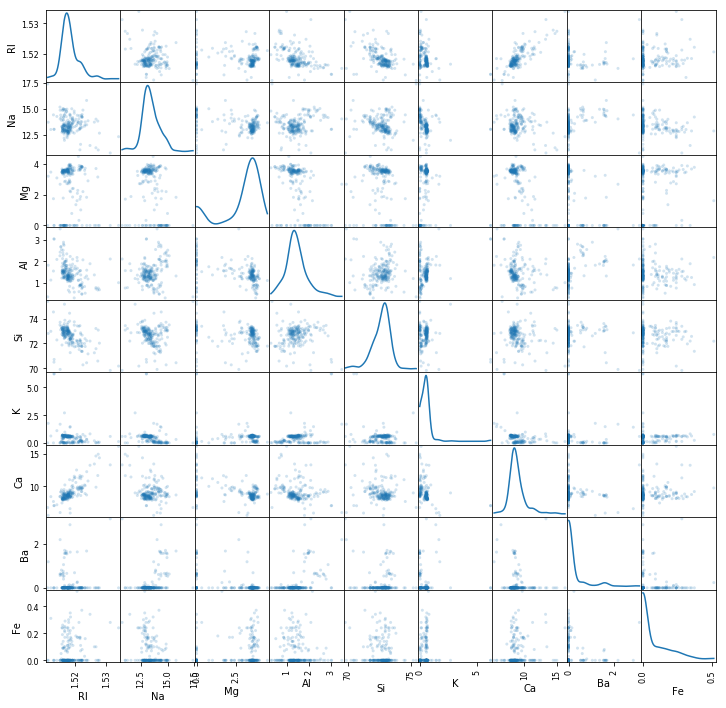

In [104]:
# Create a scatter matrix of the dataframe features
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.show()

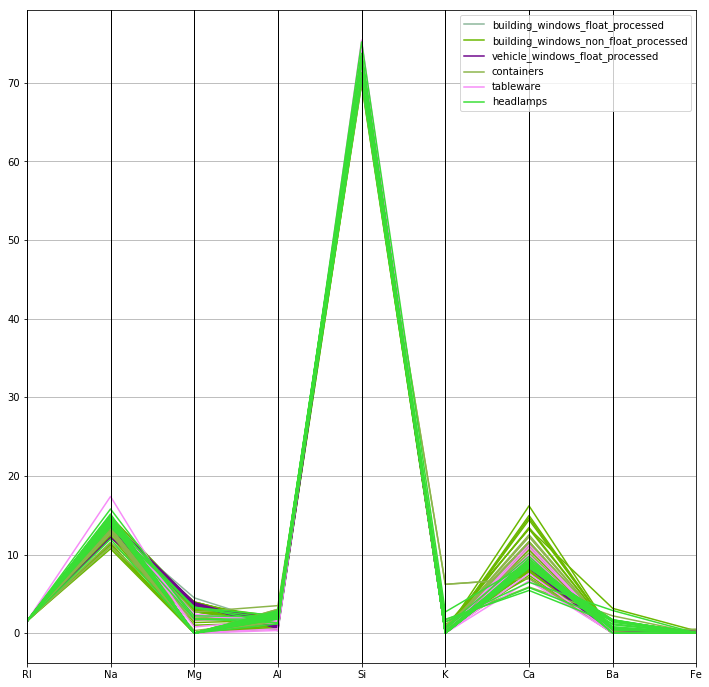

In [105]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(12,12))
parallel_coordinates(df, 'label')
plt.show()

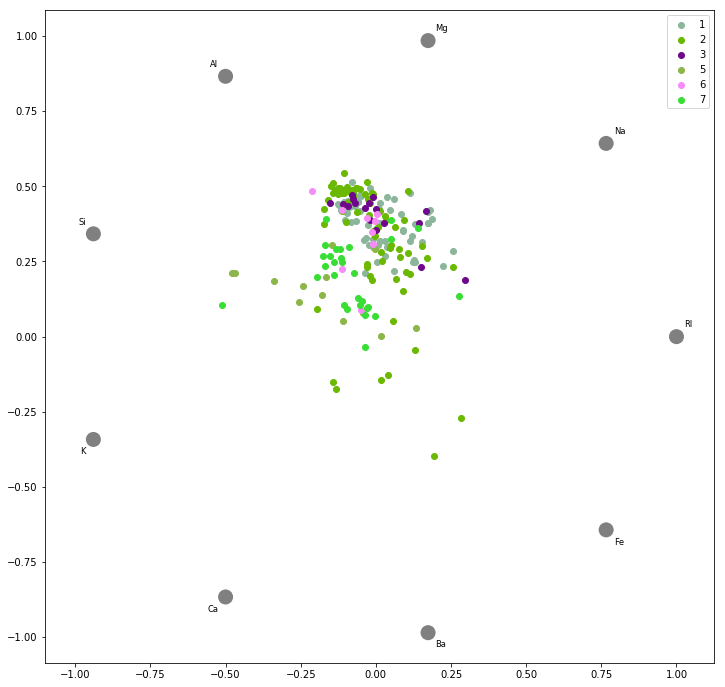

In [10]:
df.head()
from pandas.plotting import radviz
plt.figure(figsize=(12,12))
radviz(df, 'label')
plt.show()

## Introduction to Scikit-Learn

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas.io.sql as pd_sql
import sqlite3 as sql
import os
import json
import time
import pickle
import requests

In [27]:
# get the data
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"

def fetch_data(fname='glass_dataset.txt'):
    """
    Helper method to retreive the ML Repository dataset.
    """
    response = requests.get(URL)
    outpath  = os.path.abspath(fname)
    with open(outpath, 'wb') as f:
        f.write(response.content)
    
    return outpath

# Fetch the data if required
DATA = fetch_data()

FEATURES  = [
    "Id",
    "RI",
    "Na",
    "Mg",
    "Al",
    "Si",
    "K",
    "Ca",
    "Ba",
    "Fe",
    "label"
]

LABEL_MAP = {
    1: "building_windows_float_processed",
    2: "building_windows_non_float_processed",
    3: "vehicle_windows_float_processed",
    4: "vehicle_windows_non_float_processed",
    5: "containers",
    6: "tableware",
    7: "headlamps",
}


In [28]:
# Read the data into a DataFrame
train = pd.read_csv(DATA, sep=',', header=None, names=FEATURES)

In [29]:

#Is it all still here?
train.head(5)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,label
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Let's use the Python library Scikit-learn to see if we can do a little better!

## Using Scikit-learn

Scikit-Learn is a powerful machine learning library implemented in Python with numeric and scientific computing powerhouses Numpy, Scipy, and matplotlib for extremely fast analysis of small to medium-sized data sets. It is open source, commercially usable and contains many modern machine learning algorithms for classification, regression, clustering, feature extraction, and optimization. For this reason Scikit-Learn is often the first tool in a data scientist's toolkit for machine learning of incoming data sets.

In [30]:
train.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,label
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Ok, we've got a table of purely numeric data with no null values. We're ready to go.

### LOGISTIC REGRESSION

A logistic regression mathematically calculates the decision boundary between the possibilities. It looks for a straight line that represents a cutoff that most accurately represents the training data.

In [18]:
from sklearn.linear_model import LogisticRegression

In [31]:
#We will use a part of the dataset to test
test = train.loc[train.Id <= 21]
test.head()
#This part is going to be used to train the model
train_log = train.loc[train.Id > 21]
train_log.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,label
21,22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.0,1
22,23,1.51736,12.78,3.62,1.29,72.79,0.59,8.70,0.0,0.0,1
23,24,1.51751,12.81,3.57,1.35,73.02,0.62,8.59,0.0,0.0,1
24,25,1.51720,13.38,3.50,1.15,72.85,0.50,8.43,0.0,0.0,1
25,26,1.51764,12.98,3.54,1.21,73.00,0.65,8.53,0.0,0.0,1


In [24]:
# Initialize our algorithm
lr = LogisticRegression(random_state=1)

In [32]:
# Define our predictors
predictors = ["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe"]
expected  = train_log["label"]

# Train the algorithm using all the training data
lr.fit(train_log[predictors], expected)

# Make predictions using the training set -- where we already know the correct answers
predicted = lr.predict(train_log[predictors])

In [33]:
# Make predictions based on the test data
predictions = lr.predict(test[predictors])

# Frame your submission for Kaggle
test_predictions = pd.DataFrame({
        "GlassId": test["label"],
        "TypeOfGlassPredicted": predictions
    })
test_predictions.head(10)

,GlassId,TypeOfGlassPredicted
0,1,1
1,1,2
2,1,2
3,1,2
4,1,2
5,1,2
6,1,1
7,1,1
8,1,2
9,1,2


Well that was easy! But how can we find out how well it worked?

### Cross-Validation   

For Kaggle, the training samples are constructed by splitting our original dataset into more than one part. But what if certain chunks of our data have more variance than others? We want to ensure that our model performs just as well regardless of the particular way the data are divided up. So let's go back and do some cross-validation splits.    

More on cross-validation tools inside Scikit-learn here:    
http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html

In [35]:
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [36]:
X = train[["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe"]]
y = train["label"]
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size = 0.2)
log_reg = lr.fit(X_train, y_train)

In [37]:
# Every estimator has a score method that can judge the quality of the 
# fit (or the prediction) on new data. Bigger is better.   
log_reg.score(X_test, y_test)

0.5348837209302325

We can also ask for a classification report.

In [38]:
from sklearn.metrics import classification_report

In [53]:
expected   = y_test
predicted  = log_reg.predict(X_test)
classificationReport = classification_report(expected, predicted, target_names=["building_windows_float_processed","building_windows_non_float_processed","vehicle_windows_float_processed","vehicle_windows_non_float_processed","containers","tableware","headlamps"])
print(classificationReport)

                                      precision    recall  f1-score   support

    building_windows_float_processed       0.88      0.78      0.82        18
building_windows_non_float_processed       0.65      0.85      0.73        13
     vehicle_windows_float_processed       0.00      0.00      0.00         1
 vehicle_windows_non_float_processed       0.00      0.00      0.00         3
                          containers       0.00      0.00      0.00         1
                           tableware       0.78      1.00      0.88         7

                         avg / total       0.69      0.74      0.71        43



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 6, does not match size of target_names, 7
  .format(len(labels), len(target_names))
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


How do I interpret this report?
    
Precision is the number of correct positive results divided by the number of all positive results (e.g. how many of the type of glass we identified actually belong to that type of glass?).

Recall is the number of correct positive results divided by the number of positive results that should have been returned (e.g. how many of the type of glasses identified did we accurately predict (identified correcly)?). 

The F1 score is a measure of a test's accuracy. It considers both the precision and the recall of the test to compute the score. The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst at 0.    

    precision = true positives / (true positives + false positives)

    recall = true positives / (false negatives + true positives)

    F1 score = 2 * ((precision * recall) / (precision + recall))
    
So how well did our Logistic Regression Model do?    

In [41]:
# Make predictions based on the test data
predictions = log_reg.predict(test[predictors])

# Frame your 1st submission to Kaggle
kgl_submission_lr = pd.DataFrame({
        "GlassId": test["label"],
        "TypeOfGlassPredicted": predictions
    })
kgl_submission_lr.to_csv('lr_model.csv', index=False)

kgl_submission_lr.head(10)

,GlassId,TypeOfGlassPredicted
0,1,1
1,1,1
2,1,2
3,1,1
4,1,1
5,1,2
6,1,1
7,1,1
8,1,2
9,1,1


### RANDOM FOREST    

Some models will work better than others! Let's try another one.    

A random forest is a 'meta estimator'. It will fit a number of decision trees (we'll have to tell it how many) on various sub-samples of the dataset. Then it will use averaging to improve the predictive accuracy and control over-fitting.    

Read more about Random Forests here:    
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
# We'll select 50 trees and opt for 'out-of-bag' samples to estimate the generalization error.
rf = RandomForestClassifier(n_estimators=150, oob_score=True) 

In [44]:
# Next split up the data with the 'train test split' method in the Cross Validation module
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# ...and then run the 'fit' method to build a forest of trees
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [45]:
rf.score(X_test, y_test)

0.7906976744186046

In [46]:
expected   = y_test
predicted  = rf.predict(X_test)
classificationReport = classification_report(expected, predicted, target_names=["building_windows_float_processed","building_windows_non_float_processed","vehicle_windows_float_processed","vehicle_windows_non_float_processed","containers","tableware","headlamps",])
print(classificationReport)

                                      precision    recall  f1-score   support

    building_windows_float_processed       0.86      0.86      0.86        14
building_windows_non_float_processed       0.63      0.92      0.75        13
     vehicle_windows_float_processed       0.00      0.00      0.00         2
 vehicle_windows_non_float_processed       1.00      0.75      0.86         4
                          containers       1.00      0.50      0.67         2
                           tableware       1.00      0.75      0.86         8

                         avg / total       0.80      0.79      0.78        43



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 6, does not match size of target_names, 7
  .format(len(labels), len(target_names))
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


So how did we do with our Random Forest Classifier? Sometimes visualizations can
help us to interpret our results. Here is a function that will take our classification
report and create a color-coded heat map that tells us where our model is strong (deep
reds) and/or weak (lighter pinks).

In [47]:
def plot_classification_report(cr, title='Classification report', cmap=plt.cm.Reds):

    lines = cr.split('\n')
    classes = []
    plotMat = []

    for line in lines[2 : (len(lines) - 3)]:
        t = line.split()
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        plotMat.append(v)

    fig, ax = plt.subplots(1)
    fig = plt.imshow(plotMat, interpolation='nearest', cmap=cmap)
    
    for c in range(len(plotMat)+1):
        for r in range(len(classes)):
            try:
                txt = plotMat[r][c]
                ax.text(c,r,plotMat[r][c],va='center',ha='center')
            except IndexError:
                pass
            
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes))
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Measures')

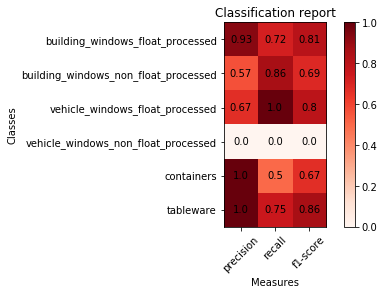

In [34]:
plot_classification_report(classificationReport)

In [48]:
# Make predictions based on the test data
predictions = rf.predict(test[predictors])

# Frame your 2nd submission to Kaggle
kgl_submission_rf = pd.DataFrame({
        "GlassId": test["label"],
        "TypeOfGlassPredicted": predictions
    })
kgl_submission_rf.to_csv('rf_model.csv', index=False)

kgl_submission_rf.head(10)

,GlassId,TypeOfGlassPredicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


### SVM    

Support vector machines use points in transformed problem space to separate the classes into groups.

In [50]:
from sklearn.svm import SVC

In [51]:
kernels = ['linear', 'poly', 'rbf']

splits     = cross_validation.train_test_split(X,y, test_size=0.2)
X_train, X_test, y_train, y_test = splits

for kernel in kernels:
    if kernel != 'poly':
        model      = SVC(kernel=kernel)
    else:
        model      = SVC(kernel=kernel, degree=3)

model.fit(X_train, y_train)
expected   = y_test
predicted  = model.predict(X_test)

SVC_report = classification_report(expected, predicted)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


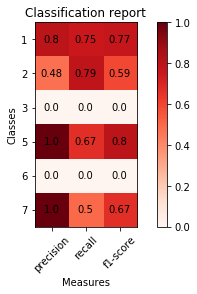

In [69]:
plot_classification_report(SVC_report)

In [52]:
# Make predictions based on the test data
predictions = model.predict(test[predictors])

# Frame your 3th submission to Kaggle
kgl_submission_svm = pd.DataFrame({
        "GlassId": test["label"],
        "TypeOfGlassPredicted": predictions
    })
kgl_submission_svm.to_csv('svm_model.csv', index=False)
kgl_submission_svm.head(10)

,GlassId,TypeOfGlassPredicted
0,1,1
1,1,2
2,1,2
3,1,2
4,1,2
5,1,2
6,1,2
7,1,2
8,1,2
9,1,2


So of the three methods -  Logistic Regression, Random Forest, and SVM, which one performed the best on this data set? 


### Resources and Further Reading    

See also:    
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html    
http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html    
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html    
http://scikit-learn.org/stable/modules/svm.html      

## Data Extraction 

One way that we can structure our data for easy management is to save files on disk. The Scikit-Learn datasets are already structured this way, and when loaded into a `Bunch` (a class imported from the `datasets` module of Scikit-Learn) we can expose a data API that is very familiar to how we've trained on our toy datasets in the past. A `Bunch` object exposes some important properties:

- **data**: array of shape `n_samples` * `n_features`
- **target**: array of length `n_samples`
- **feature_names**: names of the features
- **target_names**: names of the targets
- **filenames**: names of the files that were loaded
- **DESCR**: contents of the readme

**Note**: This does not preclude database storage of the data, in fact - a database can be easily extended to load the same `Bunch` API. Simply store the README and features in a dataset description table and load it from there. The filenames property will be redundant, but you could store a SQL statement that shows the data load. 

In order to manage our data set _on disk_, we'll structure our data as follows:

In [55]:
from sklearn.datasets.base import Bunch

DATA_DIR = os.path.abspath(os.path.join(".", "..", "marceloismael"))
print("DATA_DIR:" + str(DATA_DIR))
# Show the contents of the data directory
for name in os.listdir(DATA_DIR):
    if name.startswith("."): continue
    print("- {}".format(name))

DATA_DIR:/georgetown/ds/XBUS-505-01.Data_Analysis_II_Machine_Learning/machine-learning/examples/marceloismael
- glass-identification-random-forest-classifier.pickle
- glass-identification-knn-classifier.pickle
- glass_dataset.txt
- README.md
- rf_model.csv
- ML_Glass_Identification_CSI.ipynb
- wheat-svm-classifier.pickle
- svm_model.csv
- data
- lr_model.csv
- Glass_Identification_CSI.ipynb
- glass-identification-svm-classifier.pickle
- meta.json


In [66]:
def load_data(root=DATA_DIR):
    # Construct the `Bunch` for the glass dataset
    filenames     = {
        'meta': os.path.join(root, 'meta.json'),
        'rdme': os.path.join(root, 'README.md'),
        'data': os.path.join(root, 'glass_dataset.txt'),
    }

    # Load the meta data from the meta json
    with open(filenames['meta'], 'r') as f:
        meta = json.load(f)
        target_names  = meta['target_names']
        feature_names = meta['feature_names']

    # Load the description from the README. 
    with open(filenames['rdme'], 'r') as f:
        DESCR = f.read()

    # Load the dataset from the text file.
    dataset = np.loadtxt(filenames['data'], delimiter=",")

    # Extract the target from the data
    data   = dataset[:, 1:-1]
    target = dataset[:, -1]

    # Create the bunch object
    return Bunch(
        data=data,
        target=target,
        filenames=filenames,
        target_names=target_names,
        feature_names=feature_names,
        DESCR=DESCR
    )

# Save the dataset as a variable we can use.
dataset = load_data()

print(dataset.data.shape)
print(dataset.target.shape)

(214, 9)
(214,)


## Classification 

Now that we have a dataset `Bunch` loaded and ready, we can begin the classification process. Let's attempt to build a classifier with kNN, SVM, and Random Forest classifiers. 

In [63]:
from sklearn import metrics
from sklearn import cross_validation
from sklearn.cross_validation import KFold

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [67]:
def fit_and_evaluate(dataset, model, label, **kwargs):
    """
    Because of the Scikit-Learn API, we can create a function to
    do all of the fit and evaluate work on our behalf!
    """
    start  = time.time() # Start the clock! 
    scores = {'precision':[], 'recall':[], 'accuracy':[], 'f1':[]}
    
    for train, test in KFold(dataset.data.shape[0], n_folds=12, shuffle=True):
        X_train, X_test = dataset.data[train], dataset.data[test]
        y_train, y_test = dataset.target[train], dataset.target[test]
        
        estimator = model(**kwargs)
        estimator.fit(X_train, y_train)
        
        expected  = y_test
        predicted = estimator.predict(X_test)
        
        # Append our scores to the tracker
        scores['precision'].append(metrics.precision_score(expected, predicted, average="weighted"))
        scores['recall'].append(metrics.recall_score(expected, predicted, average="weighted"))
        scores['accuracy'].append(metrics.accuracy_score(expected, predicted))
        scores['f1'].append(metrics.f1_score(expected, predicted, average="weighted"))

    # Report
    print("Build and Validation of {} took {:0.3f} seconds".format(label, time.time()-start))
    print("Validation scores are as follows:\n")
    print(pd.DataFrame(scores).mean())
    
    # Write official estimator to disk
    estimator = model(**kwargs)
    estimator.fit(dataset.data, dataset.target)
    
    outpath = label.lower().replace(" ", "-") + ".pickle"
    with open(outpath, 'wb') as f:
        pickle.dump(estimator, f)

    print("\nFitted model written to:\n{}".format(os.path.abspath(outpath)))

In [68]:
# Perform SVC Classification
fit_and_evaluate(dataset, SVC, "Glass Identification SVM Classifier")

Build and Validation of Glass Identification SVM Classifier took 0.039 seconds
Validation scores are as follows:

accuracy     0.681100
f1           0.651071
precision    0.670706
recall       0.681100
dtype: float64

Fitted model written to:
/georgetown/ds/XBUS-505-01.Data_Analysis_II_Machine_Learning/machine-learning/examples/marceloismael/glass-identification-svm-classifier.pickle


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [78]:
# Perform kNN Classification
fit_and_evaluate(dataset, KNeighborsClassifier, "Glass Identification kNN Classifier", n_neighbors=3)

Build and Validation of Glass Identification kNN Classifier took 0.028 seconds
Validation scores are as follows:

accuracy     0.681373
f1           0.678053
precision    0.712913
recall       0.681373
dtype: float64

Fitted model written to:
/georgetown/ds/XBUS-505-01.Data_Analysis_II_Machine_Learning/machine-learning/examples/marceloismael/glass-identification-knn-classifier.pickle


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [79]:
# Perform Random Forest Classification
fit_and_evaluate(dataset, RandomForestClassifier, "Glass Identification Random Forest Classifier")

Build and Validation of Glass Identification Random Forest Classifier took 0.164 seconds
Validation scores are as follows:

accuracy     0.728758
f1           0.715318
precision    0.765418
recall       0.728758
dtype: float64

Fitted model written to:
/georgetown/ds/XBUS-505-01.Data_Analysis_II_Machine_Learning/machine-learning/examples/marceloismael/glass-identification-random-forest-classifier.pickle


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py